In [16]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
import pandas as pd

In [17]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241206_140404.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241206_140404.braidz using pyarrow


In [18]:
df,csvs["opto"]

(          obj_id    frame     timestamp         x         y         z  \
 0              0    35892  1.733490e+09  0.031894 -0.094312  0.262427   
 1              0    35893  1.733490e+09  0.030845 -0.093401  0.261068   
 2              0    35894  1.733490e+09  0.029802 -0.092549  0.259687   
 3              0    35895  1.733490e+09  0.028771 -0.091734  0.258271   
 4              0    35896  1.733490e+09  0.027748 -0.090926  0.256868   
 ...          ...      ...           ...       ...       ...       ...   
 11975278  105181  8127325  1.733571e+09  0.085747 -0.033614  0.003757   
 11975279  105181  8127326  1.733571e+09  0.085756 -0.033620  0.003716   
 11975280  105181  8127327  1.733571e+09  0.085730 -0.033576  0.003699   
 11975281  105182  8127413  1.733571e+09  0.085887 -0.033794  0.004335   
 11975282  105183  8127422  1.733571e+09  0.085889 -0.033808  0.004513   
 
               xvel      yvel      zvel           P00           P01  \
 0        -0.105903  0.093027 -0.131533

In [19]:
data = extract_stimulus_centered_data(df, csvs["opto"])
AngV_SecondRepeat = data['angular_velocity']

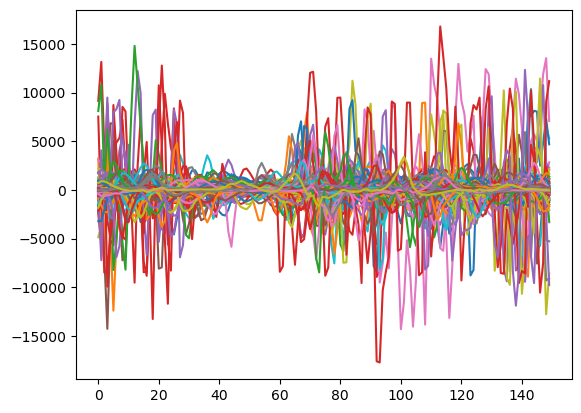

In [20]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

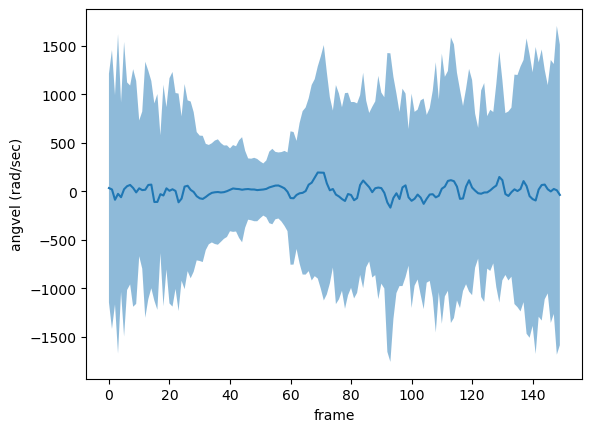

In [21]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

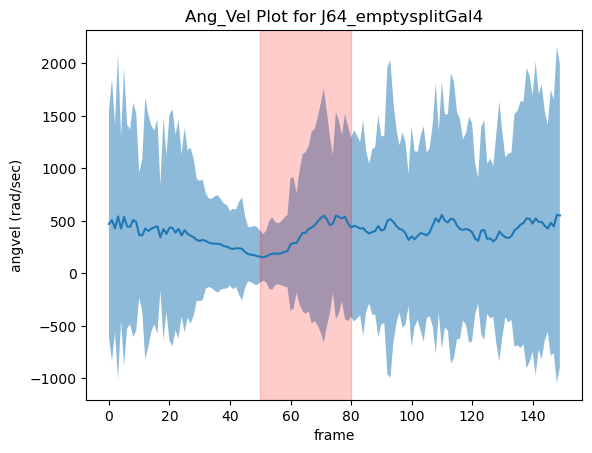

In [22]:
fig, ax = plt.subplots()
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
ax.axvspan(50, 80, color='red', alpha=0.2)
ax.set_title("Ang_Vel Plot for J64_emptysplitGal4")
plt.show()

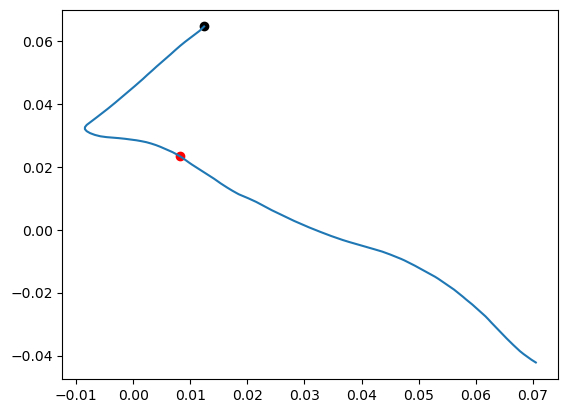

In [23]:
i = 7
traj = data["position"][i]

fig = plt.figure()
plt.plot(traj[:,0], traj[:,1])
plt.scatter(traj[50,0], traj[50,1], color="red")
plt.scatter(traj[0,0], traj[0,1], color="black")
plt.show()

<Axes: >

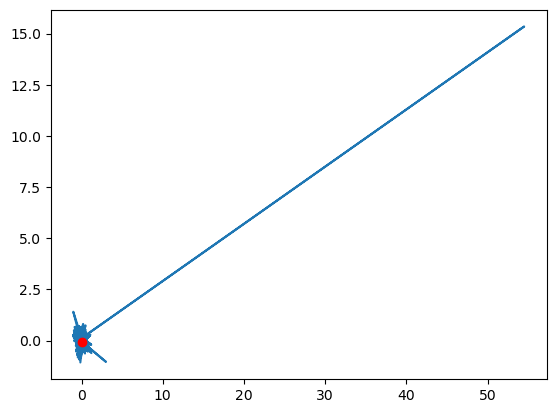

In [24]:
plot_trajectory(df)

In [25]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240924_161949.braidz")
df,csvs["opto"]


Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240924_161949.braidz using pyarrow


(         obj_id    frame     timestamp         x         y         z  \
 0             8  1120137  1.727191e+09  0.014364 -0.010718  0.165003   
 1             8  1120138  1.727191e+09  0.018904 -0.010017  0.160847   
 2             9  1120139  1.727191e+09  0.019915 -0.028692  0.160393   
 3             8  1120139  1.727191e+09  0.023445 -0.009316  0.156692   
 4             8  1120140  1.727191e+09  0.027985 -0.008615  0.152537   
 ...         ...      ...           ...       ...       ...       ...   
 9634472  111627  8072603  1.727260e+09 -0.056712 -0.233318  0.001495   
 9634473  111627  8072604  1.727260e+09 -0.056742 -0.233314  0.001483   
 9634474  111627  8072605  1.727260e+09 -0.056771 -0.233309  0.001471   
 9634475  111627  8072606  1.727260e+09 -0.056800 -0.233305  0.001459   
 9634476  111627  8072607  1.727260e+09 -0.056881 -0.233320  0.001476   
 
              xvel      yvel      zvel           P00           P01  \
 0        0.454050  0.070084 -0.415520  2.589295e-07

In [26]:
data = extract_stimulus_centered_data(df, csvs["opto"])
AngV_FirstRepeat = data['angular_velocity']

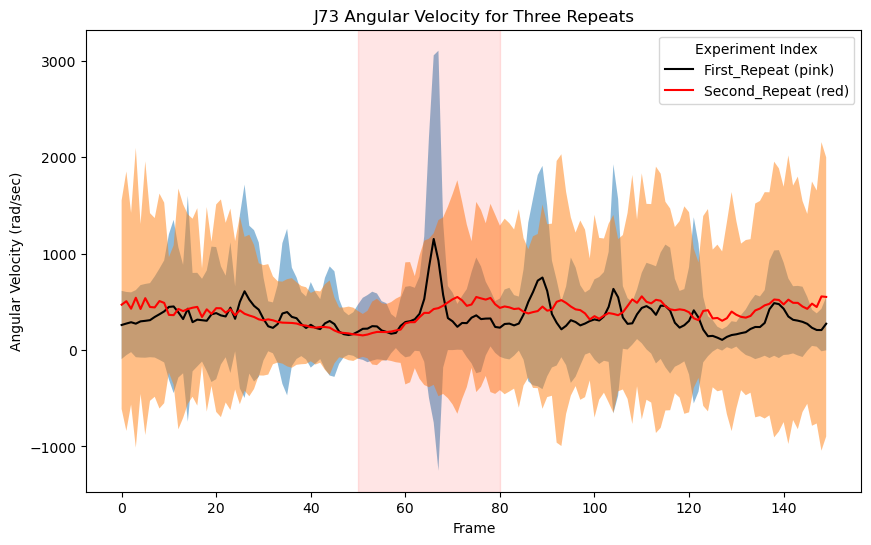

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming plot_mean_and_std is a defined function and you have data like AngV4, AngV5, and AngV6

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the angular velocities with mean and std and adding labels directly
plot_mean_and_std(np.abs(AngV_FirstRepeat), ax=ax, label='First_Repeat (pink)', color='black')
plot_mean_and_std(np.abs(AngV_SecondRepeat), ax=ax, label='Second_Repeat (red)', color='red')

# Adding labels and title
ax.set_xlabel("Frame")
ax.set_ylabel("Angular Velocity (rad/sec)")
ax.set_title("J73 Angular Velocity for Three Repeats")

ax.axvspan(50, 80, color='red', alpha=0.1)

# Adding the legend to identify each curve
ax.legend(title="Experiment Index")

# Show the plot
plt.show()

In [30]:
AngV_J64_emptysplitGal4 = np.concatenate([AngV_FirstRepeat, AngV_SecondRepeat])

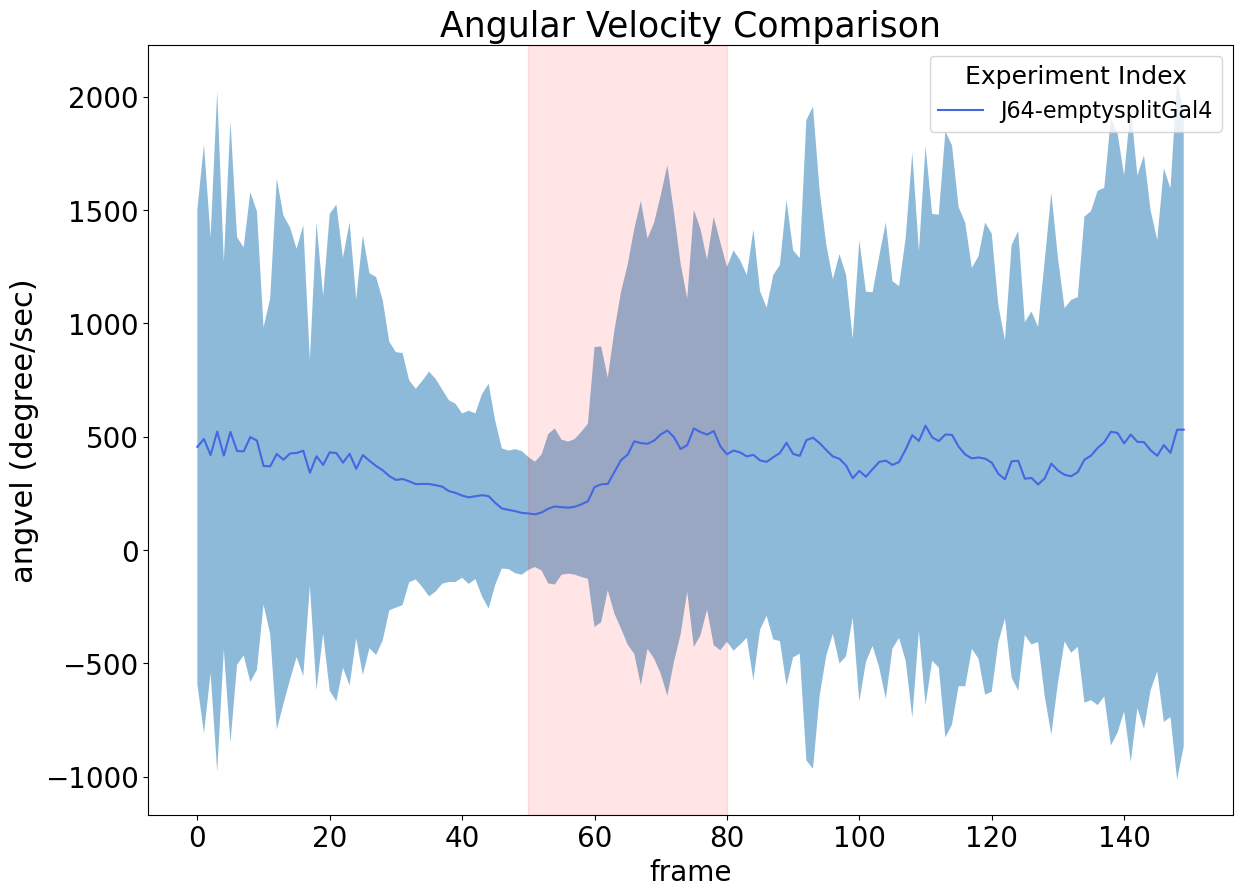

In [32]:
fig, ax = plt.subplots(figsize=(14, 10))
plot_mean_and_std(np.abs(AngV_J64_emptysplitGal4), ax=ax, label='J64-emptysplitGal4', color='royalblue')
ax.set_xlabel("frame", fontsize = 20)
ax.set_ylabel("angvel (degree/sec)")
ax.set_title("Ang_Vel Plot")


ax.axvspan(50, 80, color='red', alpha=0.1)
plt.legend(title="Experiment Index", fontsize=16, title_fontsize=18)

plt.title("Angular Velocity Comparison", fontsize=25)
plt.ylabel("angvel (degree/sec)", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(False)

plt.show()